# Group 3
Member:
1. KOH TITO       &emsp; &emsp; &emsp; &emsp;e20200353
2. CHEA MAKARA    &emsp; &emsp;e20201131
3. AOV KEATMENG   &nbsp;&nbsp;&emsp;e20201812
4. BUT CHEABLENG  &emsp;e20200861
5. HOK KIMLEANG   &nbsp;&nbsp;&nbsp;&emsp;e20200637

<h2 style='text-align:center;'> Land price Analysis </h2>

We are now scraping data from https://www.realestate.com.kh/ and https://www.khmer24.com/km

There are 12 columns and total of 15288 rows.

The attributes:

* Price
* Size
* Title
* Location
* Type
* Property ID
* Original ID
* Listed
* Updated
* Road	
* Latitude
* Longitude

# 1. Web scraping

In [42]:
from bs4 import BeautifulSoup
from urllib import request
from urllib.request import Request, urlopen
from csv import writer
import pandas as pd

***realestate.com.kh***

In [43]:
#Get all URLs of the Land's info
#1st page
url = "https://www.realestate.com.kh/buy/?active_tab=Recent&order_by=relevance&property_type=residential&search_type=sale&categories=Land%2FDevelopment"
request_site = Request(url, headers ={'User-Agent': 'Mozilla/5.0'} )
webpage = urlopen(request_site).read()
soup = BeautifulSoup(webpage, 'html.parser')
per_link = [i['href'] for i in soup.find_all('div',class_="info listing", href=True)]
list_link = []
for i in per_link:
    list_link.append("https://www.realestate.com.kh"+i)
list_link

['https://www.realestate.com.kh/buy/phnom-penh-thmey/land-233827/',
 'https://www.realestate.com.kh/buy/koh-dach/land-232168/',
 'https://www.realestate.com.kh/buy/sangkat-bei/land-229584/',
 'https://www.realestate.com.kh/buy/sangkat-bei/land-229583/',
 'https://www.realestate.com.kh/buy/sla-kram/land-233105/',
 'https://www.realestate.com.kh/buy/stueng-mean-chey-1/land-232954/',
 'https://www.realestate.com.kh/buy/preaek-aeng/land-232913/',
 'https://www.realestate.com.kh/buy/chakto-mukh/quay-sisowath-232370/',
 'https://www.realestate.com.kh/buy/koh-dach/land-232169/',
 'https://www.realestate.com.kh/buy/ta-khmao/land-231532/',
 'https://www.realestate.com.kh/buy/dangkao/land-231184/',
 'https://www.realestate.com.kh/buy/sala-kamraeuk/land-230356/',
 'https://www.realestate.com.kh/buy/chreav/land-230311/',
 'https://www.realestate.com.kh/buy/tonle-bassac/norodom-blvd-230014/',
 'https://www.realestate.com.kh/buy/svay-dankum/land-229211/',
 'https://www.realestate.com.kh/buy/sala-kam

In [ ]:
#all pages
for num in range(2,51,1):
    try:
        url = "https://www.realestate.com.kh/buy/?active_tab=Recent&categories=Land%2FDevelopment&order_by=relevance&page="+str(num)+"&property_type=residential&search_type=sale"
        request_site = Request(url, headers ={'User-Agent': 'Mozilla/5.0'} )
        webpage = urlopen(request_site).read()
        soup = BeautifulSoup(webpage, 'html.parser')
        per_link = [i['href'] for i in soup.find_all('div',class_="info listing", href=True)]

        for i in per_link:
            list_link.append("https://www.realestate.com.kh"+i)
    except:
        pass

In [ ]:
#Get Land's detail
with open('LandSale.csv','a',encoding='utf8', newline='') as f:
    thewriter = writer(f) 
    header = ['Price','Price per m2', 'Location', 'Type','Title','Property ID', 'Original ID','Listed','Updated'] 
    thewriter.writerow(header)
for page_num in list_link:
    try:
        url = page_num
        request_site = Request(url, headers ={'User-Agent': 'Mozilla/5.0'} )
        webpage = urlopen(request_site).read()
        soup = BeautifulSoup(webpage, 'html.parser')

        with open('LandSale.csv','a',encoding='utf8', newline='') as f:
            thewriter = writer(f)

            for i in soup.find_all('div', class_='price-container'):
                per_price = i.find('span',class_='price-value').text
                per_m2 = i.find('span', class_='dimension')
                special_characters=['$','/m²','<span class="dimension">','</span>']
                for x in special_characters:
                    per_price=per_price.replace(x,"")
                    per_m2 = str(per_m2).replace(x,"")
            for j in soup.find_all('div', class_='css-fy13s7 e1ffu0v20'):
                per_location = j.find('h2').text
            for k in soup.find_all('div', class_='features-block'):
                per_type = k.find_all('span', class_='value')

            property_overview = []
            for t in per_type:
                tmp = str(t)
                special_characters=['<span class="value"> ','</span>']
                for x in special_characters:
                    tmp=tmp.replace(x,"")
                property_overview.append(tmp)
            info = [per_price, per_m2, per_location, property_overview[0],property_overview[1],property_overview[2],property_overview[3],property_overview[4],property_overview[5]]
            thewriter.writerow(info)
            per_price = ""
            per_m2 = ""
            per_location = ''
    except:
        pass

***khmer24.com***

In [ ]:
#1st page
url = "https://www.khmer24.com/en/property/land-for-sale.html"
request_site = Request(url, headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"})
webpage = urlopen(request_site).read()
soup = BeautifulSoup(webpage, 'html.parser')
per_link = [i['href'] for i in soup.find_all('a',class_="border post", href=True)]
len(per_link)

In [ ]:
#Get Land's detail
#1st page for info
with open('LandSale_kh.csv','a',encoding='utf8', newline='') as f:
    thewriter = writer(f) 
    header = ['Price','Price per m2', 'Location', 'Type','Title','Property ID', 'Original ID','Listed','Updated','Road','Latitude','Longitude'] 
    thewriter.writerow(header)
for m in per_link:
    url1 = m
    try:
        url = url1.encode('ascii', 'ignore').decode('ascii')
        request_site = Request(url, headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'})
        webpage = urlopen(request_site).read()
        soup = BeautifulSoup(webpage, 'html.parser')
        with open('LandSale_kh.csv','a',encoding='utf8', newline='') as f:
            thewriter = writer(f)
            for i in soup.find_all('p', class_='price price_tag'):
                per_price = i.find('b', class_='price').text
                price = per_price.replace("$", "").replace(',','')
                price = float(price)
            for j in soup.find_all('ul', class_='list-unstyled item-info m-0'):
                info_list = [span.text for span in j.find_all('span', class_='value')]
                property_id = info_list[0]
                land_type = info_list[1]
                location = info_list[2]
                listed = info_list[3]
            for k in soup.find_all('ul', class_='list-unstyled item-fields'):
                size_list = [span.text for span in k.find_all('span', class_='value')]
                size = float(size_list[0])
            for l in soup.find_all('div', class_='item-detail p-3'):
                text = l.find('p', class_='post-description').text
            if text.find('ប្លង់រឹង') != -1:
                title = 'Hard Title'
            else:
                title = 'Soft Title'
            if price < 9999: 
                land_price = price*size
            else:
                land_price = price
            j = ''    
            for j in soup.find_all('div', class_ = 'item-detail p-3'):
                spec = j.find('p', class_= 'post-description').text

                if spec.find('ក្រវ៉ាត់ក្រុង') != -1:
                    loc2 = 'Ring Road'
                elif spec.find('ផ្លូវជាតិ') != -1:
                    loc2 = 'National Road'
                else:
                    loc2 = 'On Road'    
            m = ''
            for m in soup.find_all('div', class_='content'):
                ll_link = [m['href'] for m in soup.find_all('a',class_="map_box btn_showMap", href=True)]

            url_str = ll_link[0]
            start_idx = url_str.find('=') + 1
            end_idx = len(url_str)
            coord_str = url_str[start_idx:(end_idx-3)]
            lat, lon = coord_str.split(",")
            
            info = [land_price, size, location, land_type, title,property_id,"",listed,'',loc2,lat,lon]
            thewriter.writerow(info)
    except:
        pass

In [ ]:
#all pages
for i in range(460):
    url = "https://www.khmer24.com/en/property/land-for-sale.html?location=&per_page="+str((i+1)*50)
    request_site = Request(url, headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"})
    webpage = urlopen(request_site).read()
    soup = BeautifulSoup(webpage, 'html.parser')
    per_link = [i['href'] for i in soup.find_all('a',class_="border post", href=True)]
    
    for m in per_link:
        url1 = m
        try:
            url = url1.encode('ascii', 'ignore').decode('ascii')
            request_site = Request(url, headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'})
            webpage = urlopen(request_site).read()
            soup = BeautifulSoup(webpage, 'html.parser')
            with open('LandSale_kh.csv','a',encoding='utf8', newline='') as f:
                thewriter = writer(f)
                for i in soup.find_all('p', class_='price price_tag'):
                    per_price = i.find('b', class_='price').text
                    price = per_price.replace("$", "").replace(',','')
                    price = float(price)
                for j in soup.find_all('ul', class_='list-unstyled item-info m-0'):
                    info_list = [span.text for span in j.find_all('span', class_='value')]
                    property_id = info_list[0]
                    land_type = info_list[1]
                    location = info_list[2]
                    listed = info_list[3]
                for k in soup.find_all('ul', class_='list-unstyled item-fields'):
                    size_list = [span.text for span in k.find_all('span', class_='value')]
                    size = float(size_list[0])
                for l in soup.find_all('div', class_='item-detail p-3'):
                    text = l.find('p', class_='post-description').text
                if text.find('ប្លង់រឹង') != -1:
                    title = 'Hard Title'
                else:
                    title = 'Soft Title'
                if price < 9999: 
                    land_price = price*size
                else:
                    land_price = price
                j = ''    
                for j in soup.find_all('div', class_ = 'item-detail p-3'):
                    spec = j.find('p', class_= 'post-description').text

                    if spec.find('ក្រវ៉ាត់ក្រុង') != -1:
                        loc2 = 'Ring Road'
                    elif spec.find('ផ្លូវជាតិ') != -1:
                        loc2 = 'National Road'
                    else:
                        loc2 = 'On Road'    
                m = ''
                for m in soup.find_all('div', class_='content'):
                    ll_link = [m['href'] for m in soup.find_all('a',class_="map_box btn_showMap", href=True)]

                url_str = ll_link[0]
                start_idx = url_str.find('=') + 1
                end_idx = len(url_str)
                coord_str = url_str[start_idx:(end_idx-3)]
                lat, lon = coord_str.split(",")

                info = [land_price, size, location, land_type, title,property_id,"",listed,'',loc2,lat,lon]
                thewriter.writerow(info)
        except:
            pass

# 2. Data Cleaning

In [44]:
from bs4 import BeautifulSoup
from urllib import request
from urllib.request import Request, urlopen
from csv import writer
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import numpy as np
import seaborn as sns

In [45]:
df = pd.read_csv('LandSale_kh.csv')
df

,Price,Size,Location,Type,Title,Property ID,Original ID,Listed,Updated,Road,Latitude,Longitude
0,2624100.0,17494,Phnom Penh,Land for Sale,Hard Title,9168610,NaN,14-Jun-23,NaN,Ring Road,10.374895,112.344616
1,30990000.0,134727,Kandal,Land for Sale,Hard Title,5871599,NaN,12-Jun-23,NaN,Ring Road,10.374895,112.344616
2,206550.0,4590,Kampong Cham,Land for Sale,Soft Title,9185107,NaN,12-Jun-23,NaN,National Road,12.079261,104.716659
3,203100.0,4062,Siem Reap,Land for Sale,Soft Title,8571644,NaN,12-Jun-23,NaN,On Road,11.570873,104.833842
4,3096250.0,2477,Phnom Penh,Land for Sale,Hard Title,9168667,NaN,12-Jun-23,NaN,On Road,11.570873,104.833842
...,...,...,...,...,...,...,...,...,...,...,...,...
6531,367350.0,14694,Kampong Speu,Land for Sale,Soft Title,9424945,NaN,15-May-23,NaN,National Road,11.249660,104.687521
6532,555360.0,1157,Phnom Penh,Land for Sale,Hard Title,9289912,NaN,15-May-23,NaN,On Road,11.523789,104.802915
6533,226080.0,942,Kandal,Land for Sale,Soft Title,8845661,NaN,15-May-23,NaN,On Road,11.467279,104.730298
6534,750000.0,745,Phnom Penh,Land for Sale,Hard Title,9331068,NaN,15-May-23,NaN,On Road,11.640518,104.904488


In [46]:
#check duplicated values
len(df[df.duplicated()])

36

In [47]:
#drop duplicated values
df.drop_duplicates(subset=['Latitude', 'Longitude'], inplace=True)
df

,Price,Size,Location,Type,Title,Property ID,Original ID,Listed,Updated,Road,Latitude,Longitude
0,2624100.0,17494,Phnom Penh,Land for Sale,Hard Title,9168610,NaN,14-Jun-23,NaN,Ring Road,10.374895,112.344616
2,206550.0,4590,Kampong Cham,Land for Sale,Soft Title,9185107,NaN,12-Jun-23,NaN,National Road,12.079261,104.716659
3,203100.0,4062,Siem Reap,Land for Sale,Soft Title,8571644,NaN,12-Jun-23,NaN,On Road,11.570873,104.833842
5,16999.0,100,Phnom Penh,Land for Sale,Soft Title,8537489,NaN,15-Jun-23,NaN,On Road,11.624164,104.779325
6,39999.0,108,Phnom Penh,Land for Sale,Soft Title,8537485,NaN,15-Jun-23,NaN,On Road,11.562108,104.888535
...,...,...,...,...,...,...,...,...,...,...,...,...
6525,700000.0,100,Kampong Speu,Land for Sale,Soft Title,8631864,NaN,15-May-23,NaN,On Road,11.667600,104.685062
6529,378000.0,10800,Kampong Speu,Land for Sale,Soft Title,8717518,NaN,15-May-23,NaN,On Road,11.249660,104.687521
6532,555360.0,1157,Phnom Penh,Land for Sale,Hard Title,9289912,NaN,15-May-23,NaN,On Road,11.523789,104.802915
6533,226080.0,942,Kandal,Land for Sale,Soft Title,8845661,NaN,15-May-23,NaN,On Road,11.467279,104.730298


In [48]:
#check missing values
df.isnull().sum()

Price             0
Size              0
Location          0
Type              0
Title             0
Property ID       0
Original ID    3089
Listed            0
Updated        3089
Road              0
Latitude          0
Longitude         0
dtype: int64

In [49]:
#drop the entire column
df = df.drop(['Original ID', 'Updated','Type','Property ID','Listed'], axis = 1)
df

,Price,Size,Location,Title,Road,Latitude,Longitude
0,2624100.0,17494,Phnom Penh,Hard Title,Ring Road,10.374895,112.344616
2,206550.0,4590,Kampong Cham,Soft Title,National Road,12.079261,104.716659
3,203100.0,4062,Siem Reap,Soft Title,On Road,11.570873,104.833842
5,16999.0,100,Phnom Penh,Soft Title,On Road,11.624164,104.779325
6,39999.0,108,Phnom Penh,Soft Title,On Road,11.562108,104.888535
...,...,...,...,...,...,...,...
6525,700000.0,100,Kampong Speu,Soft Title,On Road,11.667600,104.685062
6529,378000.0,10800,Kampong Speu,Soft Title,On Road,11.249660,104.687521
6532,555360.0,1157,Phnom Penh,Hard Title,On Road,11.523789,104.802915
6533,226080.0,942,Kandal,Soft Title,On Road,11.467279,104.730298


In [50]:
#create Price per m2 variable
df['Price per m2'] = df['Price']/df['Size']
df

,Price,Size,Location,Title,Road,Latitude,Longitude,Price per m2
0,2624100.0,17494,Phnom Penh,Hard Title,Ring Road,10.374895,112.344616,150.000000
2,206550.0,4590,Kampong Cham,Soft Title,National Road,12.079261,104.716659,45.000000
3,203100.0,4062,Siem Reap,Soft Title,On Road,11.570873,104.833842,50.000000
5,16999.0,100,Phnom Penh,Soft Title,On Road,11.624164,104.779325,169.990000
6,39999.0,108,Phnom Penh,Soft Title,On Road,11.562108,104.888535,370.361111
...,...,...,...,...,...,...,...,...
6525,700000.0,100,Kampong Speu,Soft Title,On Road,11.667600,104.685062,7000.000000
6529,378000.0,10800,Kampong Speu,Soft Title,On Road,11.249660,104.687521,35.000000
6532,555360.0,1157,Phnom Penh,Hard Title,On Road,11.523789,104.802915,480.000000
6533,226080.0,942,Kandal,Soft Title,On Road,11.467279,104.730298,240.000000


# 3. Data Exploration

In [51]:
df.describe()

,Price,Size,Latitude,Longitude,Price per m2
count,3.089000e+03,3.089000e+03,3089.000000,3089.000000,3089.000000
mean,6.229351e+06,3.063248e+05,11.807268,104.652609,1509.551910
std,9.318772e+07,1.595531e+07,1.000973,0.881446,19438.761981
min,1.000000e+00,1.000000e+00,2.839147,100.953227,0.000014
25%,3.000000e+04,2.000000e+02,11.483956,104.336879,38.000000
50%,1.050000e+05,7.770000e+02,11.567225,104.827196,150.000000
75%,5.000000e+05,3.706000e+03,11.819107,104.916489,448.275862
max,3.214227e+09,8.867496e+08,37.203511,127.018152,1000000.000000


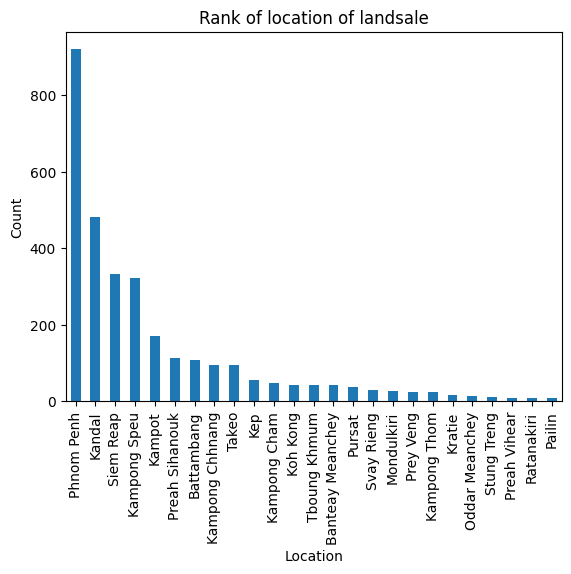

In [52]:
#find the frequency of landsale location
import matplotlib.pyplot as plt

df['Location'].value_counts().plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Rank of location of landsale')
plt.show()

In [53]:
df['Location'].value_counts()

Location
Phnom Penh          919
Kandal              481
Siem Reap           334
Kampong Speu        322
Kampot              170
Preah Sihanouk      114
Battambang          108
Kampong Chhnang      96
Takeo                95
Kep                  56
Kampong Cham         48
Koh Kong             43
Tboung Khmum         42
Banteay Meanchey     42
Pursat               39
Svay Rieng           30
Mondulkiri           28
Prey Veng            26
Kampong Thom         25
Kratie               17
Oddar Meanchey       13
Stung Treng          12
Preah Vihear         10
Ratanakiri           10
Pailin                9
Name: count, dtype: int64

<Axes: xlabel='Location'>

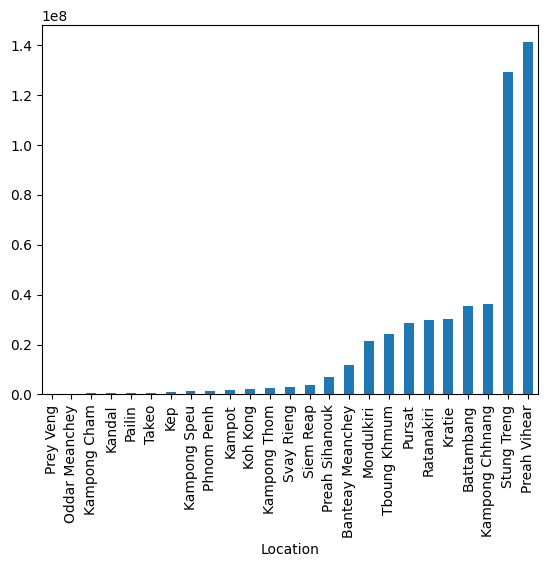

In [54]:
#Avergae price in each province or city
mean_prices = df.groupby('Location')['Price'].mean()
sorted_mean_prices = mean_prices.sort_values(ascending=True)
sorted_mean_prices.plot(kind = 'bar')

In [55]:
sorted_mean_prices

Location
Prey Veng           1.667334e+05
Oddar Meanchey      2.146003e+05
Kampong Cham        5.168336e+05
Kandal              6.638374e+05
Pailin              6.864716e+05
Takeo               7.520467e+05
Kep                 8.541749e+05
Kampong Speu        1.475447e+06
Phnom Penh          1.489665e+06
Kampot              1.782769e+06
Koh Kong            2.299227e+06
Kampong Thom        2.573020e+06
Svay Rieng          3.007094e+06
Siem Reap           3.831725e+06
Preah Sihanouk      6.829497e+06
Banteay Meanchey    1.188540e+07
Mondulkiri          2.141489e+07
Tboung Khmum        2.430659e+07
Pursat              2.845584e+07
Ratanakiri          2.981876e+07
Kratie              3.004576e+07
Battambang          3.559470e+07
Kampong Chhnang     3.612135e+07
Stung Treng         1.289338e+08
Preah Vihear        1.409333e+08
Name: Price, dtype: float64

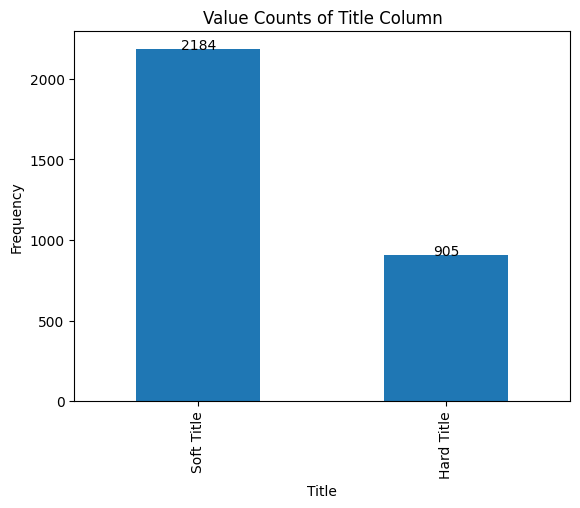

In [56]:
#Count the frequency of each type of Title exists
value_counts = df['Title'].value_counts()
value_counts.plot(kind='bar')
plt.xlabel('Title')
plt.ylabel('Frequency')
plt.title('Value Counts of Title Column')
for i in range(len(value_counts)):
    plt.text(i, value_counts[i], value_counts[i], ha='center')
plt.show()

# 4. Data Transformation

In [57]:
#Transform Location data into numerical data
gr_loc = df.groupby('Location')
avg_price = gr_loc['Price per m2'].mean()
list_price = avg_price.sort_values()
list_price

Location
Kep                  237.337756
Mondulkiri           272.256617
Prey Veng            408.564680
Koh Kong             518.134338
Banteay Meanchey     560.496189
Preah Sihanouk       599.299841
Battambang           649.329908
Takeo                710.164795
Kampong Thom         903.259803
Kandal               907.812419
Pailin               955.112481
Preah Vihear         975.002589
Svay Rieng          1061.636240
Kampong Chhnang     1272.118403
Kampong Speu        1282.157065
Phnom Penh          1518.401282
Kampong Cham        1703.233593
Pursat              1780.320631
Kampot              1828.186387
Tboung Khmum        2120.939241
Stung Treng         2312.193733
Kratie              2493.377252
Ratanakiri          3507.553122
Siem Reap           3680.810758
Oddar Meanchey      4173.304473
Name: Price per m2, dtype: float64

In [58]:
for i,j in zip(range(0,25,1),list_price):
    df.loc[(df.Location == list_price.index[i]), 'Location'] = i
gr_loc = df.groupby('Location')
avg_price = gr_loc['Price per m2'].mean()
list_price = avg_price.sort_values()
list_price

Location
0      237.337756
1      272.256617
2      408.564680
3      518.134338
4      560.496189
5      599.299841
6      649.329908
7      710.164795
8      903.259803
9      907.812419
10     955.112481
11     975.002589
12    1061.636240
13    1272.118403
14    1282.157065
15    1518.401282
16    1703.233593
17    1780.320631
18    1828.186387
19    2120.939241
20    2312.193733
21    2493.377252
22    3507.553122
23    3680.810758
24    4173.304473
Name: Price per m2, dtype: float64

In [59]:
#transform Road and Title into numerical data
df.loc[(df.Title == 'Hard Title'), 'Title'] = 2
df.loc[(df.Title == 'Soft Title'), 'Title'] = 1
print(df['Title'].unique())

df.loc[(df.Road == 'National Road'), 'Road'] = 3
df.loc[(df.Road == 'Ring Road'), 'Road'] = 2
df.loc[(df.Road == 'On Road'), 'Road'] = 1
print(df['Location'].unique())

[2 1]
[15 16 23 7 9 19 14 13 6 4 8 18 5 21 3 17 24 10 2 11 0 12 20 22 1]


In [60]:
#Get rid of outliers
# Loop through each numeric column and handle outliers using the IQR method
for col in df.select_dtypes(include=np.number).columns:
    # Calculate Q1, Q3, and IQR for the current column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Determine the acceptable range of values
    lower_range = Q1 - 1.5*IQR
    upper_range = Q3 + 1.5*IQR

    # Identify and handle outliers by replacing them with the maximum non-outlier value
    outliers = df[(df[col] < lower_range) | (df[col] > upper_range)]
    df.loc[(df[col] < lower_range) | (df[col] > upper_range), col] = df[col][~((df[col] < lower_range) | (df[col] > upper_range))].max()

    print("Outliers in Column", col, ":\n", outliers)

Outliers in Column Price :
             Price    Size Location Title Road   Latitude   Longitude   
0       2624100.0   17494       15     2    2  10.374895  112.344616  \
15      4840000.0   22000        9     1    3  11.846601  104.956074   
29      1280000.0   40000        9     2    1  11.554119  104.910936   
49      7382050.0  147641       14     1    1  11.456021  104.953488   
55      2000000.0   20000        9     1    1  11.539648  104.929398   
...           ...     ...      ...   ...  ...        ...         ...   
6451   20592000.0    9360       15     1    1  11.477527  104.910153   
6466    3600000.0    2000       15     1    1  11.535358  104.944916   
6498    4200000.0    1258       15     1    1  11.583185  104.877603   
6512  149745045.0   14997       14     1    1  11.704297  104.700926   
6522    2250000.0  150000       13     1    1  11.923620  104.555745   

      Price per m2  
0        150.00000  
15       220.00000  
29        32.00000  
49        50.00000  
55

Text(0.5, 1.0, 'Correlation Heatmap')

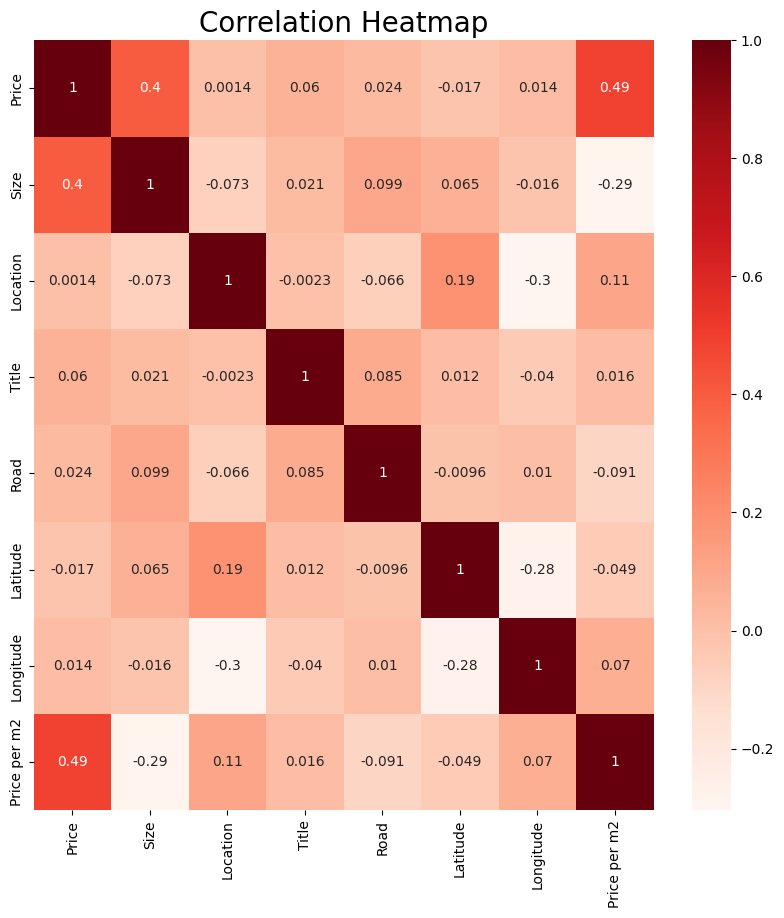

In [61]:
#Heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

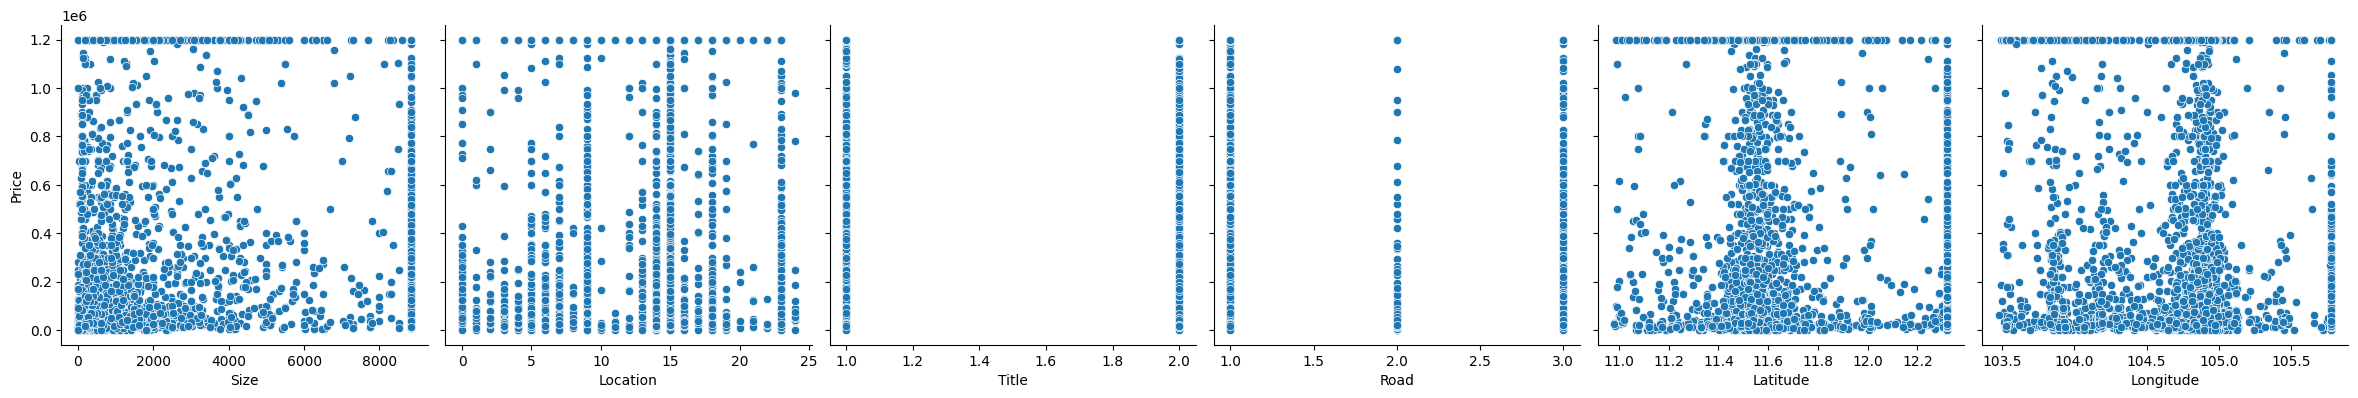

In [62]:
#Visualize the dataset
sns.pairplot(df, x_vars=['Size', 'Location', 'Title','Road','Latitude','Longitude'], y_vars='Price', height=4, aspect=1, kind='scatter')
plt.show()

# 5. Model Selection

***Multi Linear Regression***

In [63]:
#Split the dataset into training and testing sets
X = df[['Size','Location','Title','Road','Latitude','Longitude','Price per m2']]
y = df['Price']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

#Select a machine learning model and train it on the training set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [64]:
#Evaluate the model's performance on the testing set
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R^2 score:', r2_score(y_test, y_pred))

Mean squared error: 62220948944.69456
R^2 score: 0.6552455889592035


***Polynomial Regression***

In [26]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

X = df[['Size','Location','Title','Road','Latitude','Longitude','Price per m2']]
y = df['Price']

# Generate polynomial features
degree = 2  # Set the degree of the polynomial
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.05, random_state=0)

# Create and train the polynomial regression model
model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression())
model.fit(X_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [27]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R^2)
r2 = r2_score(y_test, y_pred)

# Print the MSE and R-squared
print("Mean Squared Error (MSE):", mse)
print("R-squared (R^2):", r2)

Mean Squared Error (MSE): 24024419932.299725
R-squared (R^2): 0.8668852712015251


***Support Vector Machines(Linear SVM)***

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

data = df

# Separate independent and dependent variables
X = data[['Size', 'Price per m2', 'Latitude', 'Longitude', 'Location', 'Title', 'Road']]
y = data['Price']

# Convert categorical variables to numerical representation (one-hot encoding)
X_encoded = pd.get_dummies(X, columns=['Location', 'Title', 'Road'])

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Perform feature scaling on numerical variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[['Size', 'Price per m2', 'Latitude', 'Longitude']])
X_test_scaled = scaler.transform(X_test[['Size', 'Price per m2', 'Latitude', 'Longitude']])

# Create an instance of the SVM model
svm_model = SVR(kernel='linear', C=1.0)

# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train)

# Use the trained model to make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

price_bins = [0, 500000, 1000000, 1500000, 2000000, 3000000, float('inf')]
labels = [0, 1, 2, 3, 4, 5]

y_pred_class = pd.cut(y_pred, bins=price_bins, labels=labels)
y_test_class = pd.cut(y_test, bins=price_bins, labels=labels)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate accuracy score for classification
accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy Score: {accuracy}")

Mean Squared Error: 241390587919.41534
Accuracy Score: 0.7411003236245954


***Decision Tree***

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = df

# Preprocessing: Separating features and target variable
X = data[['Size', 'Price per m2', 'Location', 'Title', 'Road', 'Latitude', 'Longitude']]
y = data['Price']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
print('Decision Tree MSE:', mse_dt)
print('Decision Tree RMSE:', rmse_dt)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred_dt)
print(f"R-squared (R2): {r2}")


Decision Tree MSE: 45938264749.69073
Decision Tree RMSE: 214332.13653041096
R-squared (R2): 0.754456233384935


***Random Forest***

In [69]:
data = df

# Preprocessing: Separating features and target variable
X = data[['Size', 'Price per m2', 'Location', 'Title', 'Road', 'Latitude', 'Longitude']]
y = data['Price']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#random forest
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
print('Random Forest MSE:', mse_rf)
print('Random Forest RMSE:', rmse_rf)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred_rf)
print(f"R-squared (R2): {r2}")

Random Forest MSE: 27007481283.553116
Random Forest RMSE: 164339.53049571827
R-squared (R2): 0.8556428128645379


***Gradient Boosting***

In [70]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [71]:
# Assuming you have your input features stored in X and target variable stored in y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
# Initialize the model with desired hyperparameters
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [73]:
# Fit the model to the training data
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [74]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [75]:
# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
print('R^2 score:', r2_score(y_test, y_pred))

Mean Squared Error: 24679674159.752728
R^2 score: 0.8680851315338598
